<a href="https://colab.research.google.com/github/fidelmetekohy02/python11/blob/main/tugas11Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [10]:
ls

 3scene/
 Daun/
 modeldaun_scene/
 nnmodel_scene/
'TugasPython13-PATHLOSS SIMULATION-Fidel Alessandro Metekohy-1101208226-TTX-44-01.ipynb'
 Untitled0.ipynb
 Untitled1.ipynb
 Untitled2.ipynb


In [11]:
# import the necessary packages
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os

In [12]:
# grab all image paths in the input dataset directory, then initialize
# our list of images and corresponding class labels
print ("[INFO] loading images...")
imagePaths = paths.list_images("Daun")
data = []
labels = []

[INFO] loading images...


In [13]:
# loop over our input images
for imagePath in imagePaths:
  # load the input image from disk, resize it ti 128x128 pixels, scale
  # the pixel intensities to the range [0, 1], and then update our
  # image list
  image = Image.open(imagePath)
  image = np.array(image.resize((128, 128))) / 255.0 #normalisasi
  data.append(image)

  # extract the class lavel from the file path update the
  # labels list
  label = imagePath.split(os.path.sep)[-2]
  labels.append(label)

In [14]:
print(labels)

['GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07',

In [15]:
# encode the labels, converting them from strings to integers
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [16]:
print(labels)

[[1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 ...
 [0 0 1 0 0]
 [0 0 1 0 0]
 [0 0 1 0 0]]


In [17]:
# perform a training and testing split, using 75% of the data for
# training and 25% for evaluation
(trainX, testX, trainY, testY) = train_test_split(np.array(data), np.array(labels), test_size=0.25, shuffle=True)
print(trainX.shape)
print(testX.shape)

(447, 128, 128, 3)
(149, 128, 128, 3)


In [18]:
from keras.layers import Convolution2D, MaxPooling2D
from keras.models import Sequential
from keras.layers.core import Flatten, Dense

model = Sequential()
model.add(Convolution2D(57, 3,3, activation='relu', input_shape=(128,128,3)))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(64, 3,3, activation='relu'))
model.add(MaxPooling2D(2,2))
#fully_connected layer
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(5,activation='softmax' ))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 42, 42, 57)        1596      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 21, 21, 57)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 64)          32896     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               57700     
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 5

In [20]:
# train the model using the Adam optimizer
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model.compile(loss="categorical_crossentropy", optimizer=opt, 
              metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=75, batch_size=32)

[INFO] training network...
Epoch 1/75
14/14 [==============================] - 2s 77ms/step - loss: 0.3393 - accuracy: 0.8662 - val_loss: 0.7552 - val_accuracy: 0.7383
Epoch 2/75
14/14 [==============================] - 1s 66ms/step - loss: 0.2753 - accuracy: 0.8975 - val_loss: 0.8984 - val_accuracy: 0.6913
Epoch 3/75
14/14 [==============================] - 1s 65ms/step - loss: 0.2458 - accuracy: 0.9339 - val_loss: 0.6741 - val_accuracy: 0.7987
Epoch 4/75
14/14 [==============================] - 1s 65ms/step - loss: 0.1995 - accuracy: 0.9432 - val_loss: 0.7067 - val_accuracy: 0.7919
Epoch 5/75
14/14 [==============================] - 1s 66ms/step - loss: 0.1829 - accuracy: 0.9579 - val_loss: 0.6503 - val_accuracy: 0.7987
Epoch 6/75
14/14 [==============================] - 1s 65ms/step - loss: 0.1719 - accuracy: 0.9562 - val_loss: 0.6765 - val_accuracy: 0.7919
Epoch 7/75
14/14 [==============================] - 1s 65ms/step - loss: 0.1414 - accuracy: 0.9687 - val_loss: 0.6230 - val_acc

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


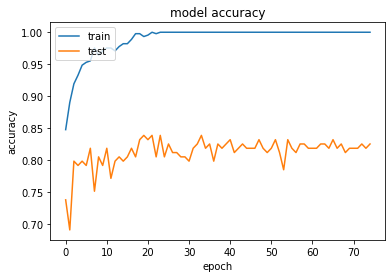

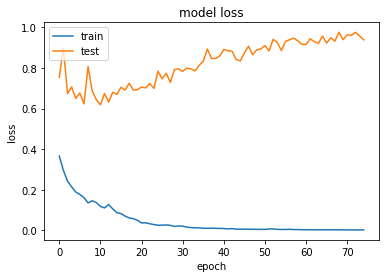

In [21]:
import matplotlib.pyplot as plt

print(H.history.keys())
#summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [22]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

      GMB_07       0.70      0.84      0.76        25
      GMB_08       0.79      0.85      0.82        27
      GMB_09       0.97      0.83      0.89        35
      GMB_10       0.93      0.77      0.84        35
      GMB_11       0.74      0.85      0.79        27

    accuracy                           0.83       149
   macro avg       0.83      0.83      0.82       149
weighted avg       0.84      0.83      0.83       149



In [25]:
model.save('nmodel_scene')

INFO:tensorflow:Assets written to: nmodel_scene/assets


In [26]:
import cv2
import matplotlib.pyplot as plt
image1='Daun/GMB_07/IMG_20200814_120040_HDR.jpg'

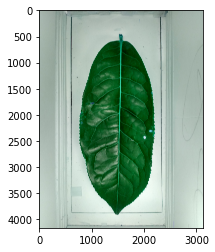

In [27]:
# print(type(img_array))
img_array = cv2.imread(image1)
plt.imshow(img_array)
plt.show()


In [28]:
image_testing = Image.open('Daun/GMB_07/IMG_20200918_083948.jpg')
image_testing = np.array(image_testing.resize((128, 128))) / 255.0
image_testing.shape

(128, 128, 3)

In [29]:
image_testing = np.expand_dims(image_testing, axis=0)
print(image_testing.shape)

(1, 128, 128, 3)


In [30]:
output = model.predict(image_testing, 1)
print(output)
print(lb.classes_[output.argmax(axis=1)])

[[9.9851388e-01 3.2961875e-06 1.4827796e-03 7.1023236e-17 4.9906355e-08]]
['GMB_07']
